# **Load data**

In [ ]:
# Import necessary libraries
import pandas as pd

# Upload the data file (make sure to upload your CSV file to Colab or provide a download link)
# Using "Electric Vehicle Population Data.csv" as an example
from google.colab import files
uploaded = files.upload()

# Read the data into a DataFrame
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

# Display the first 5 rows to understand the data structure
print(df.head())

# Information about columns and data types
df.info()

# General descriptive statistics about the data
df.describe()


Saving EV_Spatial_Distribution.html to EV_Spatial_Distribution (1).html
   VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   NISSAN   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   MODEL 3          Battery Electric Vehicle (BEV)   
2  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
3   MODEL 3          Battery Electric Vehicle (BEV)   
4      LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210161.000000,210165.000000,210160.000000,210160.000000,209720.000000,2.101650e+05,2.101610e+05
mean,98178.209406,2021.048657,50.602241,897.676889,28.929954,2.290774e+08,5.297929e+10
std,2445.429402,2.988941,86.973210,7653.588604,14.908392,7.115519e+07,1.551466e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948816e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405164e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.629758e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


# **Data cleaning and dealing with missing values**

In [ ]:
# Identify missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values and the number of missing values in each
print(missing_values[missing_values > 0])


County                    4
City                      4
Postal Code               4
Electric Range            5
Base MSRP                 5
Legislative District    445
Vehicle Location         10
Electric Utility          4
2020 Census Tract         4
dtype: int64


# **Handling missing values**

In [ ]:
# Drop rows containing any missing values
df_cleaned = df.dropna()

# Confirm that missing values have been removed
df_cleaned.isnull().sum()


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# **1_Delete rows that contain missing values**

---



In [ ]:
# Drop rows containing any missing values
df_cleaned = df.dropna()

# Confirm that missing values have been removed
print(df_cleaned.isnull().sum())


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# **2. Replace missing values ​​with the mean (for numerical columns):**

In [ ]:
# Replace missing values with the mean only for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Confirm no missing values in numeric columns
print(df[numeric_cols].isnull().sum())


,0
Postal Code,0
Model Year,0
Electric Range,0
Base MSRP,0
Legislative District,0
DOL Vehicle ID,0
2020 Census Tract,0


# **3_Replace missing values ​​in categorical columns with the most frequently occurring value:**

In [ ]:
# Replace missing values with the most frequent value only for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Confirm no missing values in categorical columns
print(df[categorical_cols].isnull().sum())


,0
VIN (1-10),0
County,0
City,0
State,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Vehicle Location,0
Electric Utility,0




# **Final verification:**

In [ ]:
# Check all columns to ensure there are no missing values
print(df.isnull().sum())


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# **Implementation of One-Hot Encoding:**


In [ ]:
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=['Make', 'Model'], drop_first=True)

# Display the shape of the data after encoding
print(df_encoded.shape)


(210165, 209)




# **Normalization of Numerical Features**


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns for normalization
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply normalization
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the normalized data
print(df[numeric_cols].head())


   Postal Code  Model Year  Electric Range  Base MSRP  Legislative District  \
0     0.987766    0.846154        0.089021        0.0              0.708333   
1     0.987664    0.730769        0.637982        0.0              0.458333   
2     0.984005    0.653846        0.044510        0.0              0.000000   
3     0.987051    0.730769        0.637982        0.0              0.458333   
4     0.984414    0.769231        0.445104        0.0              0.916667   

   DOL Vehicle ID  2020 Census Tract  
0        0.559050           0.945730  
1        0.993024           0.945730  
2        0.212763           0.946202  
3        0.989794           0.945730  
4        0.993932           0.945693  


# **5. Descriptive Statistics:**

In [ ]:
# Calculate descriptive statistics for numerical features
summary_statistics = df.describe()
print(summary_statistics)


         Postal Code     Model Year  Electric Range      Base MSRP  \
count  210165.000000  210165.000000   210165.000000  210165.000000   
mean        0.985704       0.848025        0.150155       0.001062   
std         0.024992       0.114959        0.258078       0.009057   
min         0.000000       0.000000        0.000000       0.000000   
25%         0.984414       0.769231        0.000000       0.000000   
50%         0.985160       0.884615        0.000000       0.000000   
75%         0.987705       0.923077        0.124629       0.000000   
max         1.000000       1.000000        1.000000       1.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         210165.000000   210165.000000      210165.000000  
mean               0.581874        0.477982           0.944716  
std                0.310263        0.148472           0.028198  
min                0.000000        0.000000           0.000000  
25%                0.333333        0.406629 


# **TASK 6 : Spatial Distribution of EVs (using Folium for mapping)**


In [ ]:
# Import necessary libraries
import pandas as pd
import folium  # For creating maps
from folium.plugins import HeatMap  # For adding heatmap layers
from google.colab import files  # For file upload and download
from google.colab import files
uploaded = files.upload()

# Read the data into a DataFrame
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

# Check if the 'Vehicle Location' column exists in the dataset
if 'Vehicle Location' in df.columns:

    # Extract latitude and longitude from the 'Vehicle Location' column
    #df is the dataframe that contains the data
    #POINT \(: Matches the literal word "POINT" followed by a space and an opening parenthesis.
    #([-.\d]+): Captures a numeric value, which can include digits (\d), a period (.), and a minus sign (-) for negative numbers. This corresponds to the longitude.
    #Space: Matches the space between longitude and latitude.
    #([-.\d]+): Captures the second numeric value, representing the latitude.
    #\): Matches the closing parenthesis.
    df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(r'POINT \(([-.\d]+) ([-.\d]+)\)')



    # Convert the extracted values to numeric data, handling errors if any
    #errors='coerce': handles conversion errors.
    df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
    df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')



    # Filter out rows with missing or invalid coordinates
    #dropna():This removes any rows with missing values (NaN) in either the 'Latitude' or 'Longitude' columns.
    #values:This converts the filtered DataFrame into a NumPy array (which is more efficient for numerical operations).
    #tolist():Finally, this converts the NumPy array into a Python list of lists.
    #Each inner list contains a pair of latitude and longitude values.

    heat_data = df[['Latitude', 'Longitude']].dropna().values.tolist()



    # Create a base map centered on Washington state with an appropriate zoom level
    #The location parameter sets the initial center of the map.
    #These coordinates point to Washington State, USA. The map will be initially focused on this region.
    #Higher zoom levels (e.g., 10, 15) focus on smaller areas (e.g., cities or neighborhoods).
    map = folium.Map(location=[47.7511, -120.7401], zoom_start=7)

    # Add the heatmap layer to the map using the processed coordinates
    HeatMap(heat_data).add_to(map)



    # Save the map as an HTML file for future viewing
    map.save('EV_Spatial_Distribution.html')
    print("The map has been saved as 'EV_Spatial_Distribution.html'.")
else:
    print("The dataset does not contain the 'Vehicle Location' column.")


# Provide a download link for the saved HTML map file
files.download('EV_Spatial_Distribution.html')



Saving EV_Spatial_Distribution.html to EV_Spatial_Distribution (1).html
The map has been saved as 'EV_Spatial_Distribution.html'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# **TASK 7 :Model Popularity: Analyze the popularity of different EV models (categorical data) and identify any trends.**


Top 10 Most Popular EV Models:
Model
MODEL Y           44038
MODEL 3           32520
LEAF              13606
MODEL S            7795
BOLT EV            6780
MODEL X            6239
VOLT               4815
ID.4               4716
MUSTANG MACH-E     4363
WRANGLER           4116
Name: count, dtype: int64


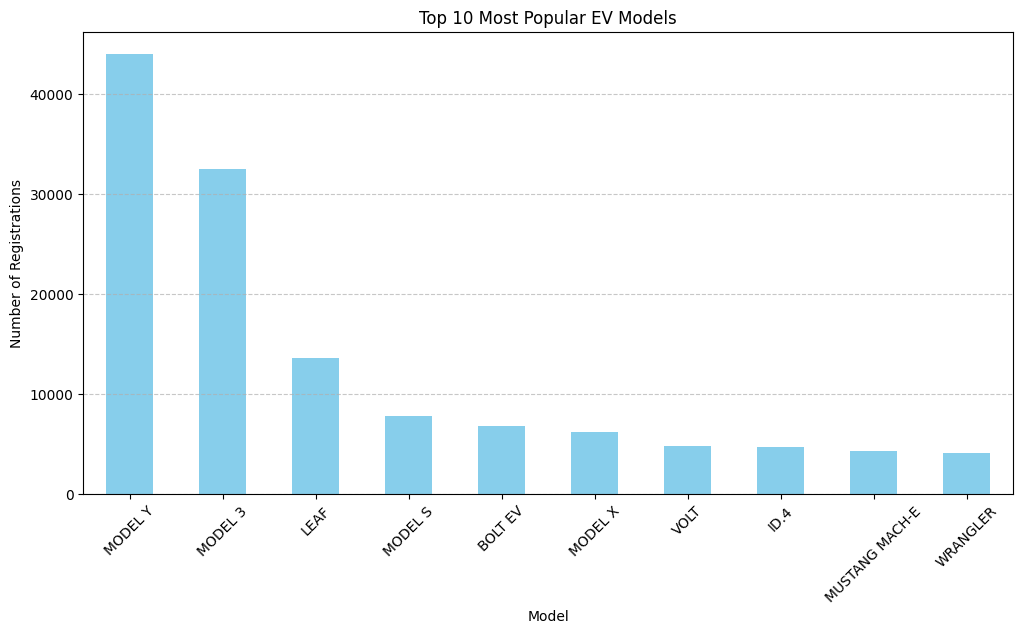

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


# Analyze the popularity of different EV models
# calculates the frequency (count) of each unique model in the 'Model' column of the DataFrame df
model_counts = df['Model'].value_counts()

# Display the top 10 most popular models
print("Top 10 Most Popular EV Models:")
print(model_counts.head(10))

# Plot a bar chart for the top 10 popular EV models
plt.figure(figsize=(12, 6))
model_counts.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Popular EV Models")
plt.xlabel("Model")
plt.ylabel("Number of Registrations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# **TASK 8 :Investigate the relationship between every pair of numeric features. Are there any correlations? Explain the results.**


Correlation Matrix:
                      Postal Code  Model Year  Electric Range  Base MSRP  \
Postal Code              1.000000   -0.001291       -0.000800  -0.003408   
Model Year              -0.001291    1.000000       -0.513534  -0.230651   
Electric Range          -0.000800   -0.513534        1.000000   0.114155   
Base MSRP               -0.003408   -0.230651        0.114155   1.000000   
Legislative District    -0.412348   -0.016824        0.019025   0.010477   
DOL Vehicle ID           0.005862    0.215703       -0.140689  -0.039501   
2020 Census Tract        0.508744    0.004710       -0.000323  -0.000283   
Longitude               -0.751845   -0.002442        0.000990   0.001741   
Latitude                 0.385764   -0.001382        0.003481   0.001547   

                      Legislative District  DOL Vehicle ID  2020 Census Tract  \
Postal Code                      -0.412348        0.005862           0.508744   
Model Year                       -0.016824        0.21570

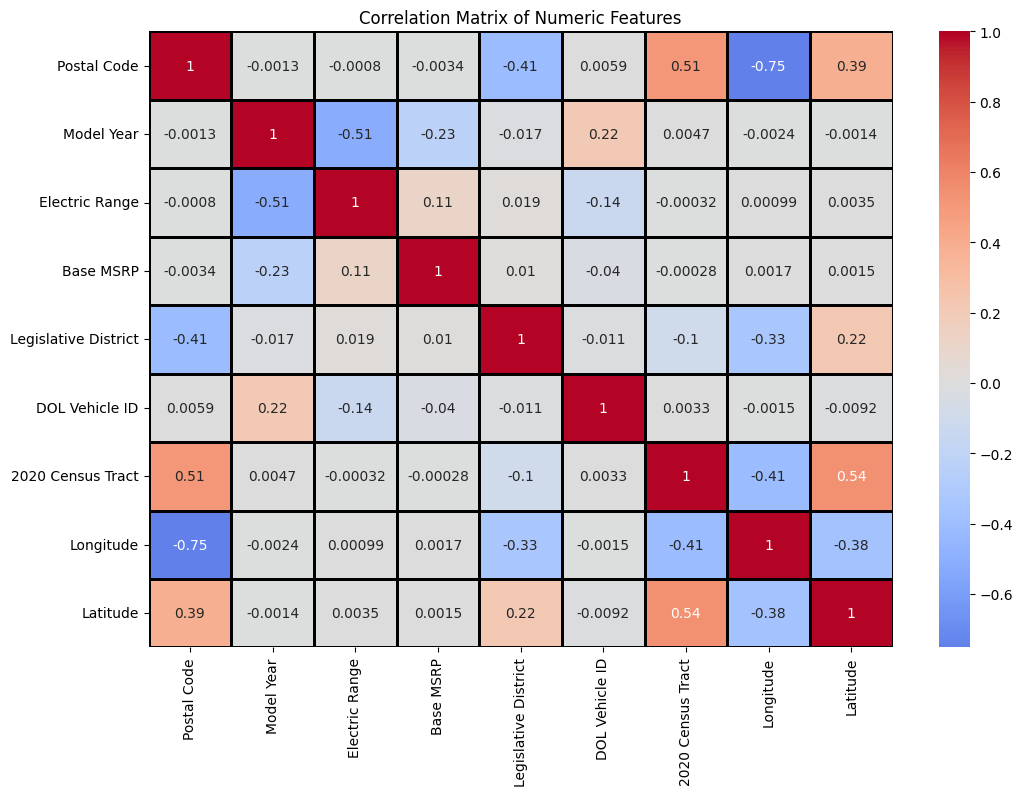

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the dataset
#float64: Used for numeric data that contains decimals (e.g., Electric Range, Base MSRP).
#int64: Used for whole numbers (e.g., Model Year, Postal Code).

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


# **TASK 9 :Data Exploration Visualizations: Create various visualizations (e.g., histograms, scatter plots, boxplots )to explore the relationships between features.**


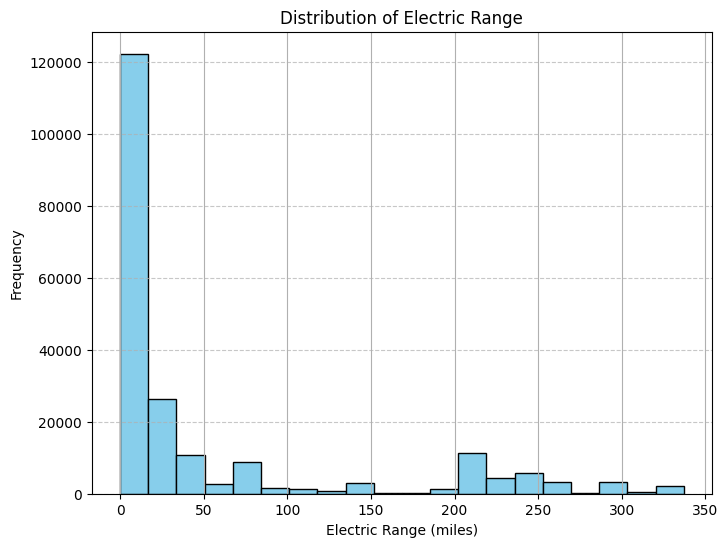

<ipython-input-6-09eadc049a9b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Model Year', y='Electric Range', palette='coolwarm')


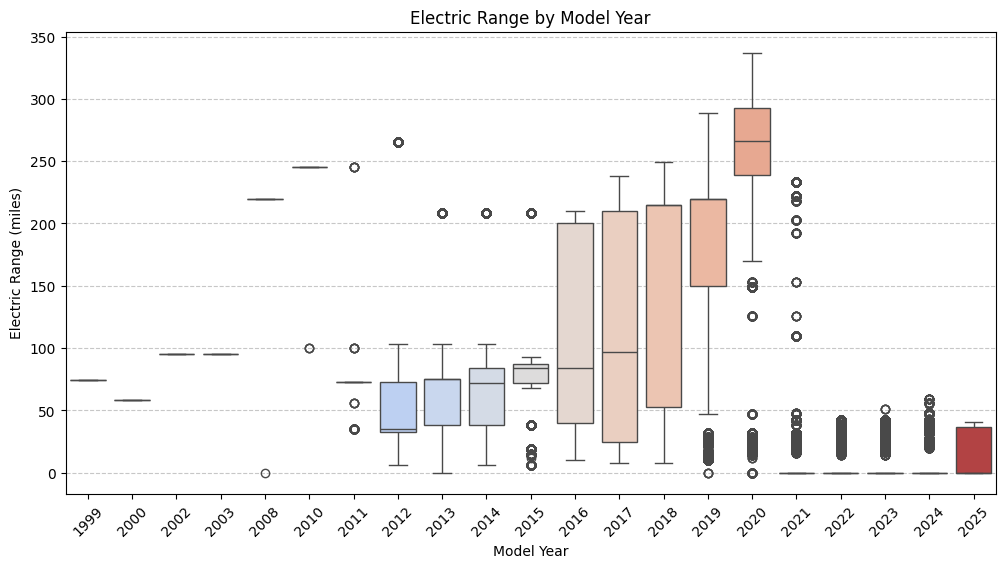

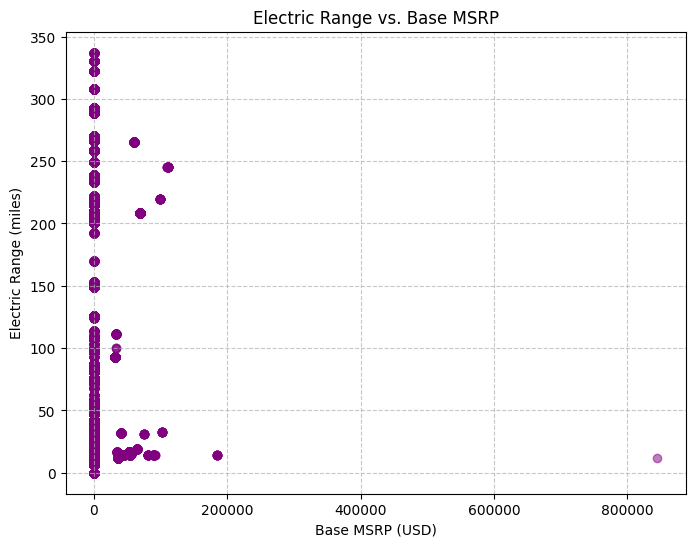

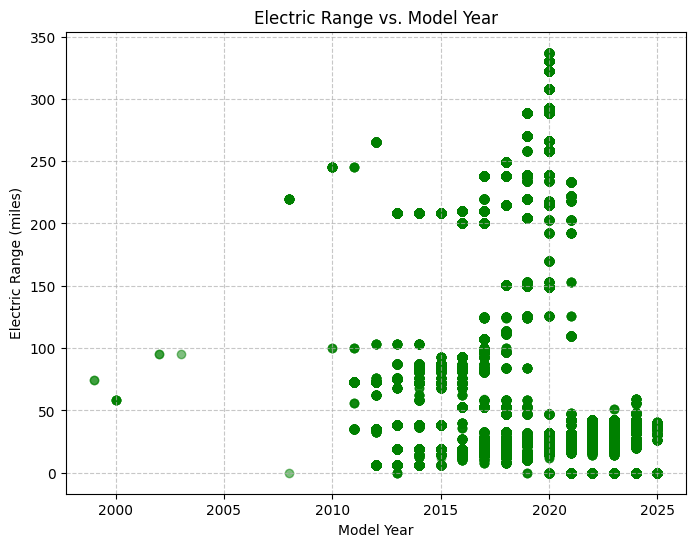

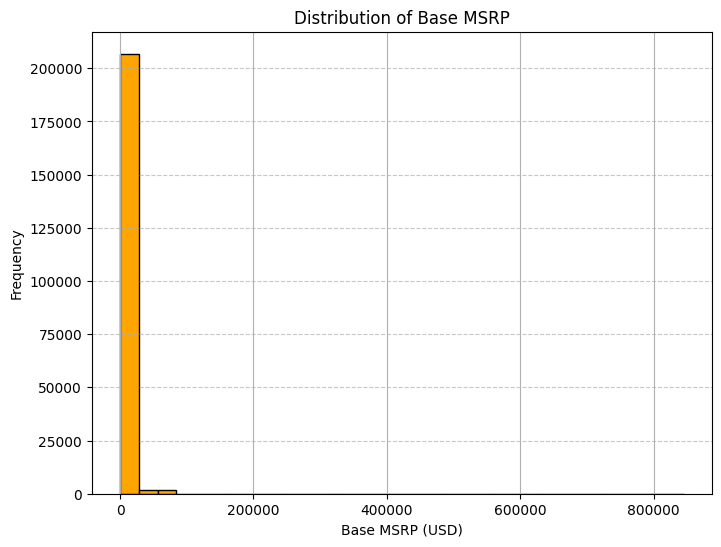

<ipython-input-6-09eadc049a9b>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Model Year', y='Base MSRP', palette='magma')


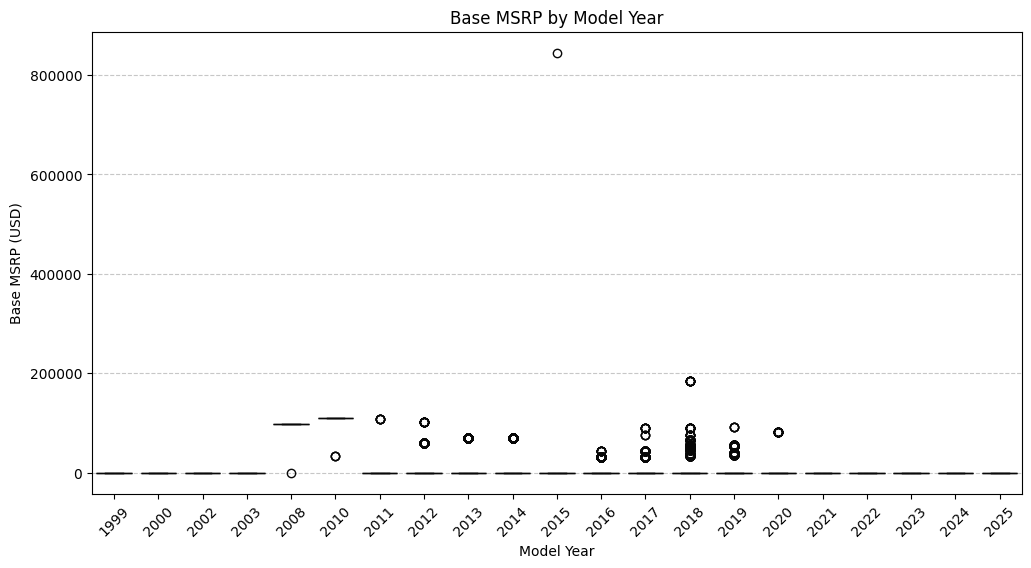

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Histogram: Distribution of Electric Range
plt.figure(figsize=(8, 6))
#bins=20:This parameter determines the number of bins (intervals) to divide the data into.
df['Electric Range'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Boxplot: Electric Range by Model Year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Model Year', y='Electric Range', palette='coolwarm')
plt.title("Electric Range by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Scatter Plot: Electric Range vs. Base MSRP
plt.figure(figsize=(8, 6))
plt.scatter(df['Base MSRP'], df['Electric Range'], alpha=0.5, color='purple')
plt.title("Electric Range vs. Base MSRP")
plt.xlabel("Base MSRP (USD)")
plt.ylabel("Electric Range (miles)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 4. Scatter Plot: Electric Range vs. Model Year
plt.figure(figsize=(8, 6))
plt.scatter(df['Model Year'], df['Electric Range'], alpha=0.5, color='green')
plt.title("Electric Range vs. Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. Histogram: Distribution of Base MSRP
plt.figure(figsize=(8, 6))
df['Base MSRP'].hist(bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Base MSRP")
plt.xlabel("Base MSRP (USD)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. Boxplot: Base MSRP by Model Year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Model Year', y='Base MSRP', palette='magma')
plt.title("Base MSRP by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Base MSRP (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **TASK 10 : Comparative Visualization: Compare the distribution of EVs across different locations (cities, counties) using bar charts or stacked bar charts.**

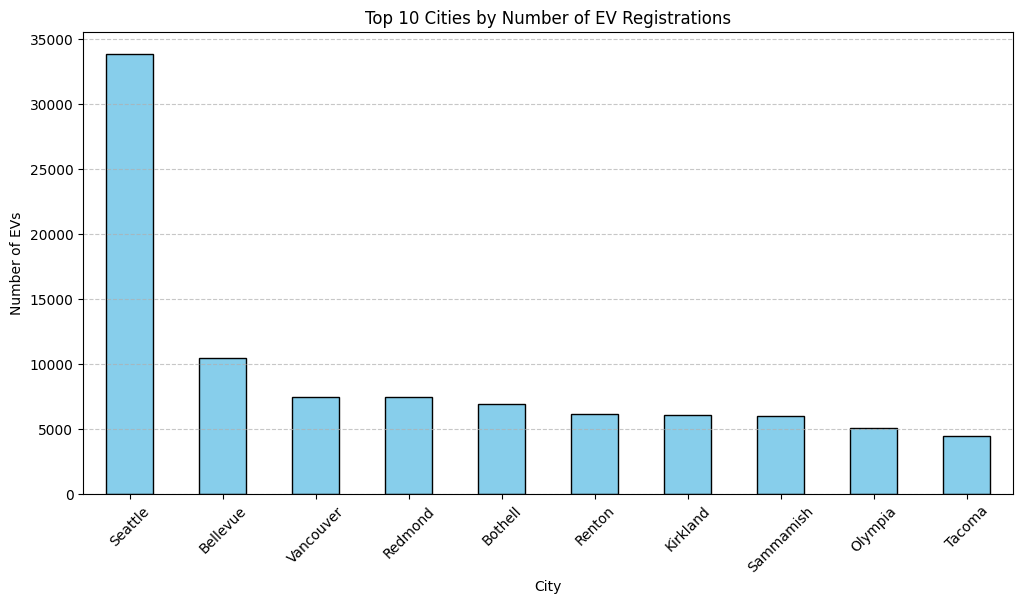

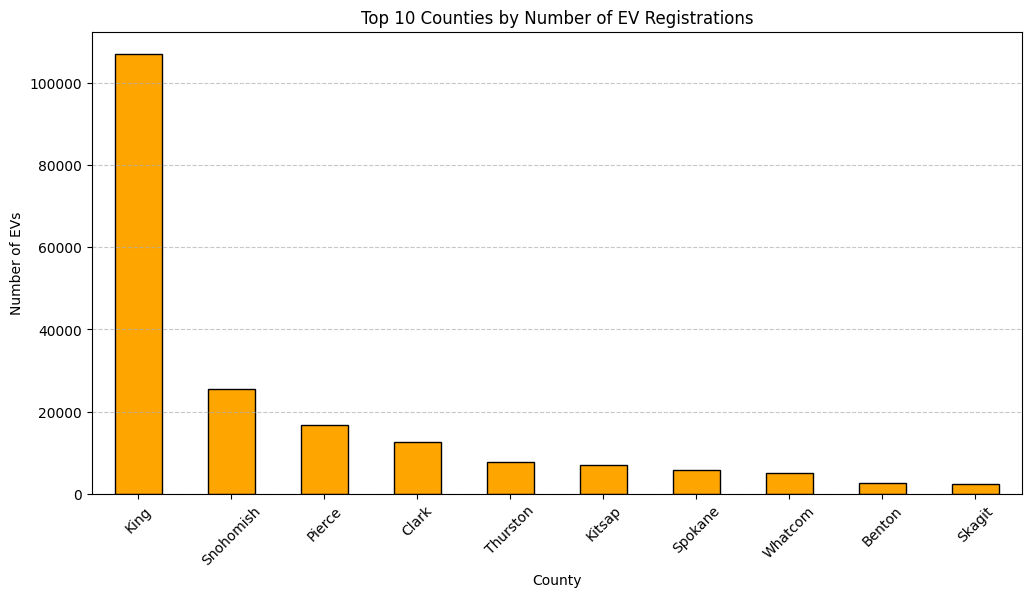

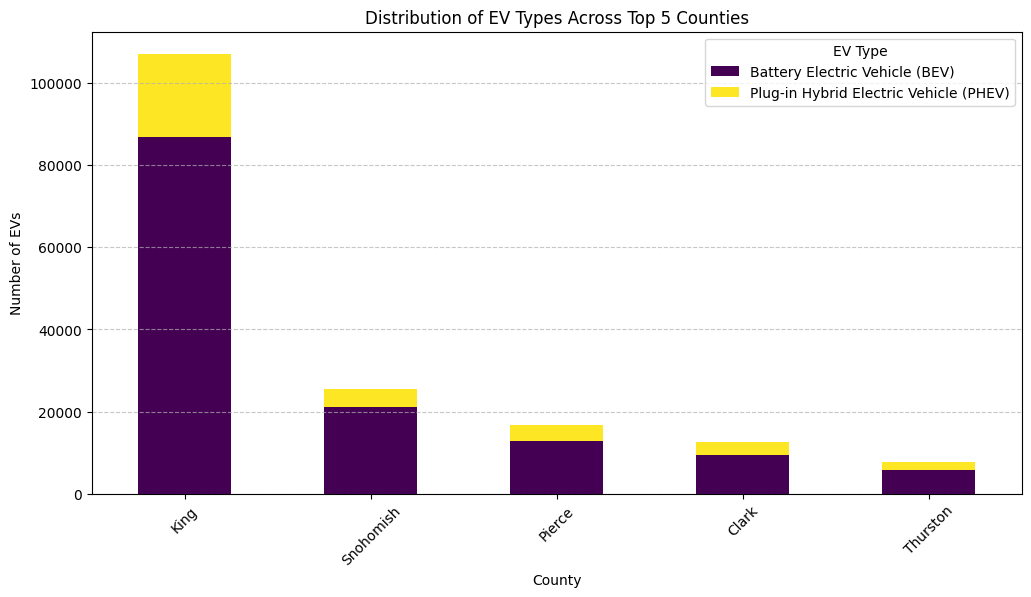

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar Chart: Top 10 Cities by Number of EV Registrations
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Cities by Number of EV Registrations")
plt.xlabel("City")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Bar Chart: Top 10 Counties by Number of EV Registrations
top_counties = df['County'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_counties.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Counties by Number of EV Registrations")
plt.xlabel("County")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Stacked Bar Chart: Comparing EV Types Across Top 5 Counties
# Group by 'County' and 'Electric Vehicle Type', then count
#size() counts how many times each combination of county and vehicle type appears.
#unstack() converts the second grouping level ('Electric Vehicle Type') into columns.
#fillna(0) replaces any missing values with 0 (in case some counties don't have all types of vehicles).
ev_type_by_county = df.groupby(['County', 'Electric Vehicle Type']).size().unstack().fillna(0)

# Select the top 5 counties by the number of EV registrations
top_5_counties = df['County'].value_counts().head(5).index

# Filter the grouped data to include only the top 5 counties
ev_type_by_county_top5 = ev_type_by_county.loc[top_5_counties]

# Plot a stacked bar chart
ev_type_by_county_top5.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Distribution of EV Types Across Top 5 Counties")
plt.xlabel("County")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.legend(title="EV Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# **TASK 11 : Temporal Analysis : If the dataset includes data across multiple time points, analyze the temporal trends in EV adoption rates and model popularity.**

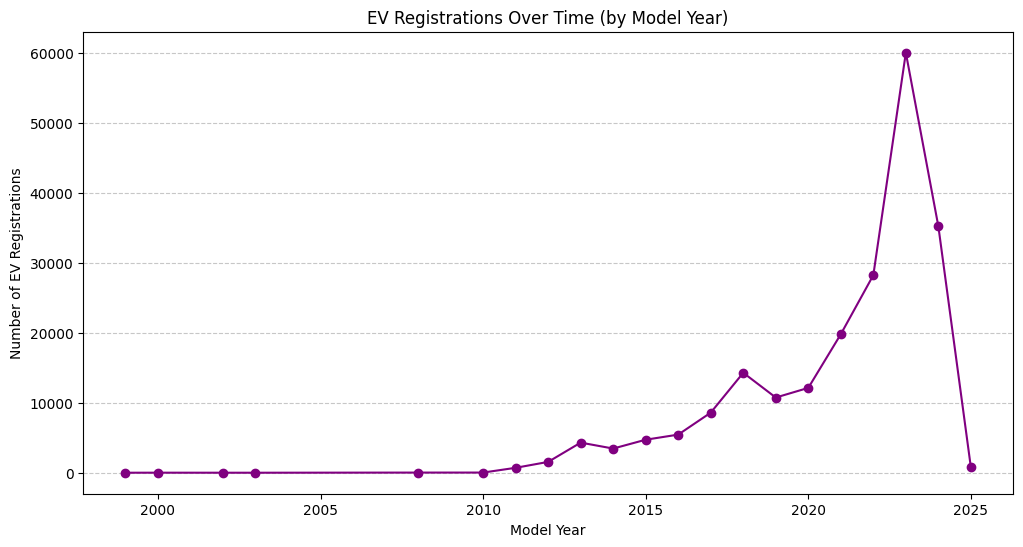

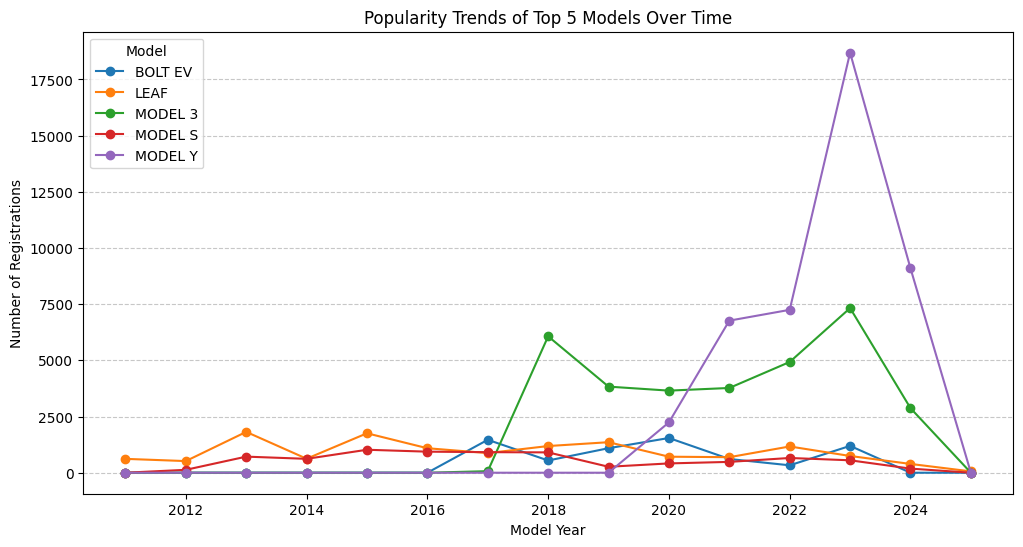

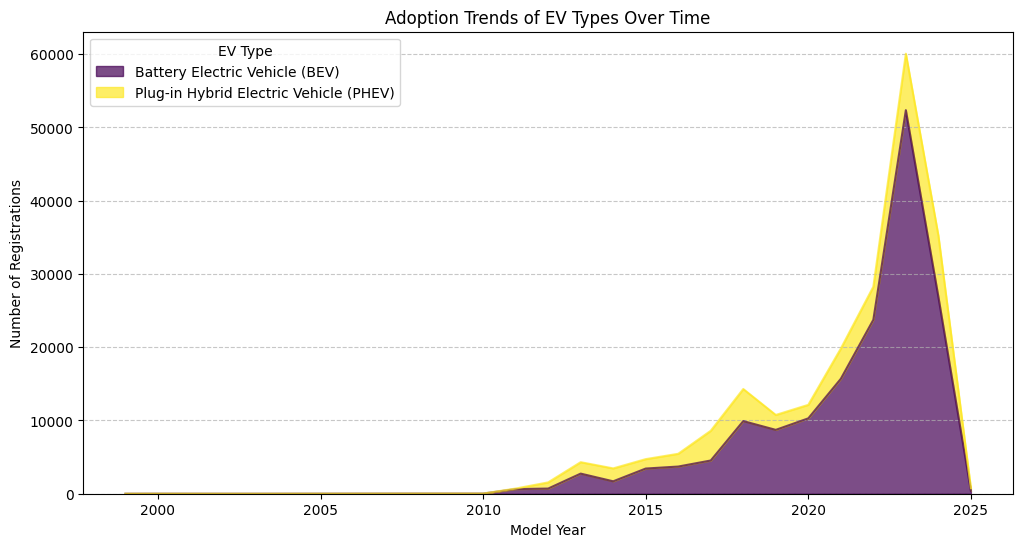

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Line Plot: Number of EV Registrations by Model Year
#Counts how many EVs were registered per model year.

ev_by_year = df['Model Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ev_by_year.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title("EV Registrations Over Time (by Model Year)")
plt.xlabel("Model Year")
plt.ylabel("Number of EV Registrations")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()






# 2. Line Plot: Popularity of Top 5 Models Over Time
#Groups the data by model year and model, then counts the number of registrations.


# Filter for the top 5 models by overall registration count
#Extracts the names of the top 5 most registered models.
top_5_models = df['Model'].value_counts().head(5).index
#Filters the DataFrame to only include rows where the 'Model' column matches one of the top 5 models.
df_top_models = df[df['Model'].isin(top_5_models)]

# Group by 'Model Year' and 'Model', then count
model_popularity_by_year = df_top_models.groupby(['Model Year', 'Model']).size().unstack().fillna(0)

# Plot the popularity trends of the top 5 models
model_popularity_by_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Popularity Trends of Top 5 Models Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of Registrations")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Model", loc='upper left')
plt.show()





# 3. Stacked Area Plot: EV Type Trends Over Time
#Groups the data by model year and electric vehicle type (e.g., BEV, PHEV).
#Creates a stacked area plot to visualize how the adoption of different EV types has evolved over time.
ev_type_by_year = df.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack().fillna(0)

# Plot stacked area chart to visualize the adoption of different EV types over time
ev_type_by_year.plot(kind='area', stacked=True, figsize=(12, 6), colormap='viridis', alpha=0.7)
plt.title("Adoption Trends of EV Types Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of Registrations")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="EV Type", loc='upper left')
plt.show()
